In [1]:
df = pd.read_csv('C:\\documents\\study material\\data science\\Machine learning udemy notes\\DATA\\moviereviews.csv')
df.head()

<IPython.core.display.Javascript object>

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [2]:
df.describe()

,label,review
count,2000,1965
unique,2,1939
top,pos,
freq,1000,27


In [3]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [2]:
df=df.dropna()

In [4]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [3]:
# this will give inverse


data=df[~df['review'].str.isspace()]

In [4]:
data=df.drop(df[df['review'].str.isspace()].reset_index()['index'])
data

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [6]:
data[data['review'].str.isspace()]

,label,review


In [8]:
data['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

In [ ]:
# countVectorize

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [6]:
cv=CountVectorizer(stop_words='english')

In [7]:
cv.fit_transform(data['review'])

<1938x38596 sparse matrix of type '<class 'numpy.int64'>'
	with 470990 stored elements in Compressed Sparse Row format>

In [8]:
cv.vocabulary_

{'films': 12846,
 'like': 19951,
 'mouse': 22485,
 'hunt': 16633,
 'theatres': 34379,
 'isn': 18124,
 'law': 19537,
 'diabolical': 9387,
 'load': 20146,
 'claptrap': 6326,
 'steven': 32703,
 'speilberg': 32111,
 'dreamworks': 10411,
 'studio': 33058,
 'hollywood': 16205,
 'family': 12408,
 'fare': 12450,
 'deadly': 8631,
 'worst': 38149,
 'takes': 33888,
 'bare': 3071,
 'threads': 34516,
 'plot': 25740,
 'tries': 35310,
 'prop': 26704,
 'overacting': 24239,
 'flat': 13051,
 'stupid': 33096,
 'slapstick': 31343,
 'makes': 20757,
 'comedies': 6810,
 'jingle': 18417,
 'way': 37471,
 'look': 20278,
 'decent': 8712,
 'comparison': 6924,
 'writer': 38211,
 'adam': 990,
 'rifkin': 28836,
 'director': 9602,
 'gore': 14651,
 'verbinski': 36808,
 'names': 22814,
 'chiefly': 6028,
 'responsible': 28496,
 'swill': 33687,
 'worth': 38150,
 'concerns': 7077,
 'brothers': 4713,
 'nathan': 22876,
 'lane': 19394,
 'appalling': 1998,
 'lee': 19646,
 'evens': 11819,
 'inherit': 17516,
 'poorly': 25951,
 

In [9]:
# Top words

matrix = cv.fit_transform(data['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
A=pd.DataFrame(sorted(freqs, key=lambda x: -x[1]))



<IPython.core.display.Javascript object>

In [10]:
A.nlargest(20,columns=1).set_index(0)

,1
0,
film,9065
movie,5520
like,3529
just,2753
good,2310
time,2302
story,2107
character,1963
characters,1795


In [30]:
freqs

In [11]:
# top 20 neg words

matrix = cv.fit_transform(data[data['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:20])


[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [12]:
# top 20 pos words

matrix = cv.fit_transform(data[data['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [32]:
y=data['label']
X=data['review']

### Training and Data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [35]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

pipe=Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [37]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [42]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [43]:
def report(model):
    preds=model.predict(X)
    print(classification_report(y,preds))
    plot_confusion_matrix(model,X,y)

              precision    recall  f1-score   support

         neg       1.00      1.00      1.00       969
         pos       1.00      1.00      1.00       969

    accuracy                           1.00      1938
   macro avg       1.00      1.00      1.00      1938
weighted avg       1.00      1.00      1.00      1938



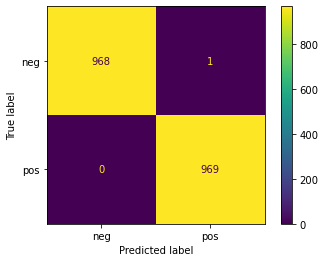

In [44]:
report(pipe)